In [21]:
import os
import json
import glob
import numpy as np
import matplotlib.pyplot as plt

In [53]:
pib_path_base = '../pib_saves/'
pib_paths = sorted(glob.glob(os.path.join(pib_path_base, '*hist*')))

dib_path_base = '../dib_saves/'
dib_paths = sorted(glob.glob(os.path.join(dib_path_base, '*hist*')))

In [80]:
def get_mean_std(file_paths):
    js = []
    for i, path in enumerate(file_paths):
        with open(path) as f:
            j = json.load(f)
            js.append(j)
    
    trains = []
    vals = []

    for j in js:
        trains.append(j['train_loss'])
        vals.append(j['val_loss'])
    
    trains = np.stack(trains)
    vals = np.stack(vals)
    
    mean_trains = np.mean(trains, axis=0)
    std_trains = np.std(trains, axis=0)

    mean_vals = np.mean(vals, axis=0)
    std_vals = np.std(vals, axis=0)
    
    upper_train = mean_trains + std_trains
    lower_train = mean_trains - std_trains

    upper_val = mean_vals + std_vals
    lower_val = mean_vals - std_vals
    
    ret = dict()
    ret['steps'] = j['steps']
    ret['train_mean'] = mean_trains
    ret['train_std'] = std_trains
    ret['train_upper'] = upper_train
    ret['train_lower'] = lower_train
    ret['val_mean'] = mean_vals
    ret['val_std'] = std_vals
    ret['val_upper'] = upper_val
    ret['val_lower'] = lower_val
    ret['trains'] = trains
    ret['vals'] = vals
    return ret

In [81]:
pib_ret = get_mean_std(pib_paths)
dib_ret = get_mean_std(dib_paths)

In [102]:
plt.figure(figsize=(20,10))

for trial, vals in enumerate(pib_ret['vals']):
    pred = plt.scatter(steps, vals, marker = '+',label=trial)
plt.legend()

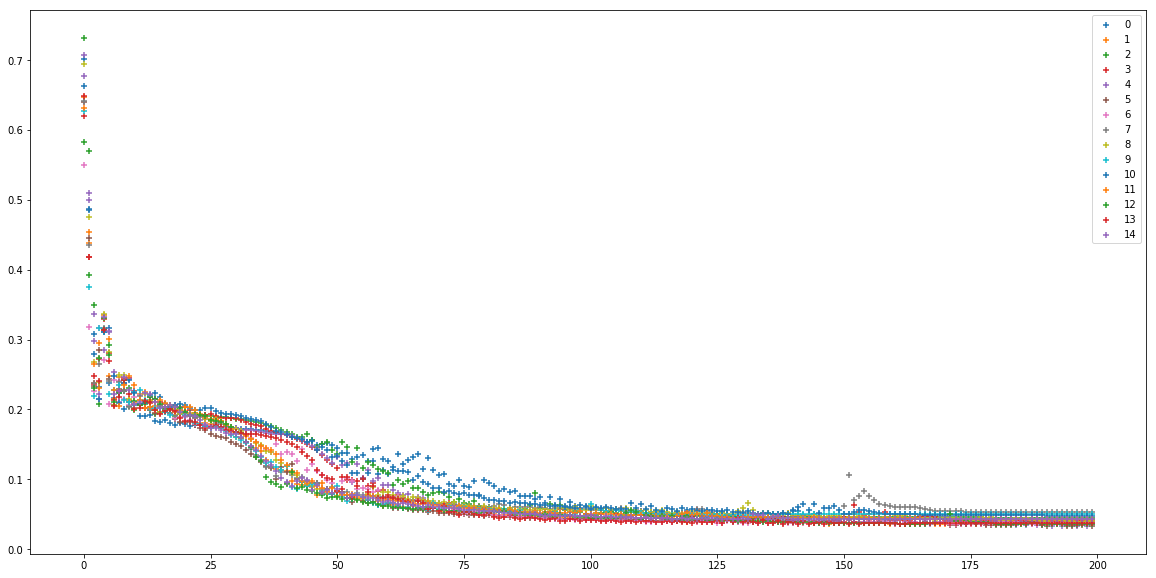

In [101]:
plt.figure(figsize=(20,10))

for trial, vals in enumerate(dib_ret['vals']):
    pred = plt.scatter(steps, vals, marker = '+',label=trial)
plt.legend()

In [106]:
best_pib_index = np.argmin(pib_ret['vals'][:,-1])
best_dib_index = np.argmin(dib_ret['vals'][:,-1])

print("Best PIB model : {}".format(pib_paths[best_pib_index]))
print("Best DIB model : {}".format(dib_paths[best_dib_index]))

Best PIB model : ../pib_saves/pib12_hist.json
Best DIB model : ../dib_saves/dib14_hist.json


In [79]:
steps = pib_ret['steps']
pib_train_upper = pib_ret['train_upper']
pib_train_lower = pib_ret['train_lower']
pib_train_mean = pib_ret['train_mean']
pib_val_upper = pib_ret['val_upper']
pib_val_lower = pib_ret['val_lower']
pib_val_mean = pib_ret['val_mean']

dib_train_upper = dib_ret['train_upper']
dib_train_lower = dib_ret['train_lower']
dib_train_mean = dib_ret['train_mean']
dib_val_upper = dib_ret['val_upper']
dib_val_lower = dib_ret['val_lower']
dib_val_mean = dib_ret['val_mean']



fig, ax = plt.subplots(figsize=(10,5), dpi=300)
ax.fill_between(steps, pib_train_upper, pib_train_lower, color='antiquewhite', alpha=0.1, label='+/- 1 std')
pib_train, = ax.plot(steps, pib_train_mean, 'o', c='orange', markersize=1.0, label='PIB-Train')
ax.fill_between(steps, pib_val_upper, pib_val_lower, color='antiquewhite', alpha=0.5, label='+/- 1 std')
pib_val, = ax.plot(steps, pib_val_mean, '-', c='orange', label='PIB-Validation')

ax.fill_between(steps, dib_train_upper, dib_train_lower, color='b', alpha=0.1, label='+/- 1 std')
dib_train, = ax.plot(steps, dib_train_lower, 'o', c='b', markersize=1.0, label='PIB-Train')
ax.fill_between(steps, dib_val_upper, dib_val_lower, color='b', alpha=0.1, label='+/- 1 std')
dib_val, = ax.plot(steps, dib_val_mean, '-', c='b', label='DIB-Validation')

ax.legend(handles=[pib_train, pib_val, dib_train, dib_val], loc='upper right')

plt.show()